## Line search

In [2]:
# import functions
source('~/Box Sync/PhDCourses/SDS385Statistical_models_for_big_data/SDS385/solutions/exercises03/backtracking_line_search.R')
source('~/Box Sync/PhDCourses/SDS385Statistical_models_for_big_data/SDS385/solutions/exercises01/gradient_descent.R')
source('~/Box Sync/PhDCourses/SDS385Statistical_models_for_big_data/SDS385/solutions/exercises01/Newton_method.R')

### Part A

Pseudo code for the backtracking line search algorithm
```
f_new = f(beta_k + alpha * p_k)  # function
f = f(beta_k)  # function
f_prime = f'(beta_k)  # function

beta = beta0  # initial values of betas
alpha = alpha0  # initial value of alpha (>0)
rho = rho0  # initial value of rho (between 0 and 1)
c =  c0  # initial value of c (between 0 and 1)

while (f_new > f + c * alpha * f_prime * p_k  {
    alpha <- rho * alpha
}
step.size = alpha
```

### Part B

In [3]:
# generate simulated data
set.seed(444)
x1 = rnorm(1000)  # some continuous variables 
x2 = rnorm(1000)
x = cbind(as.matrix(x1), as.matrix(x2))
x= cbind(x, rep(1,1000))  # add one column for intercept
z = 1 + 2*x[ ,1] + 3*x[ ,2]  # linear combination with a bias
prob = 1/(1+exp(-z))  # pass through an inv-logit function
y = as.matrix(rbinom(1000,1,prob))

In [6]:
# gradient descent coupled with backtracking line search on simulated data.
betas = matrix(1, 3, 1)
GDBT.results <- GDBacktracking(x, y, betas, max.iter=1000, alpha0 = 1, rho0 = 0.2, c0 = 1e-04, H = diag(dim(betas)[1]))

In [7]:
# gradient descent
betas = matrix(1, 3, 1)
GD.results <- gradient.descent(x, y, betas, step.size=0.01, max.iter=1000)

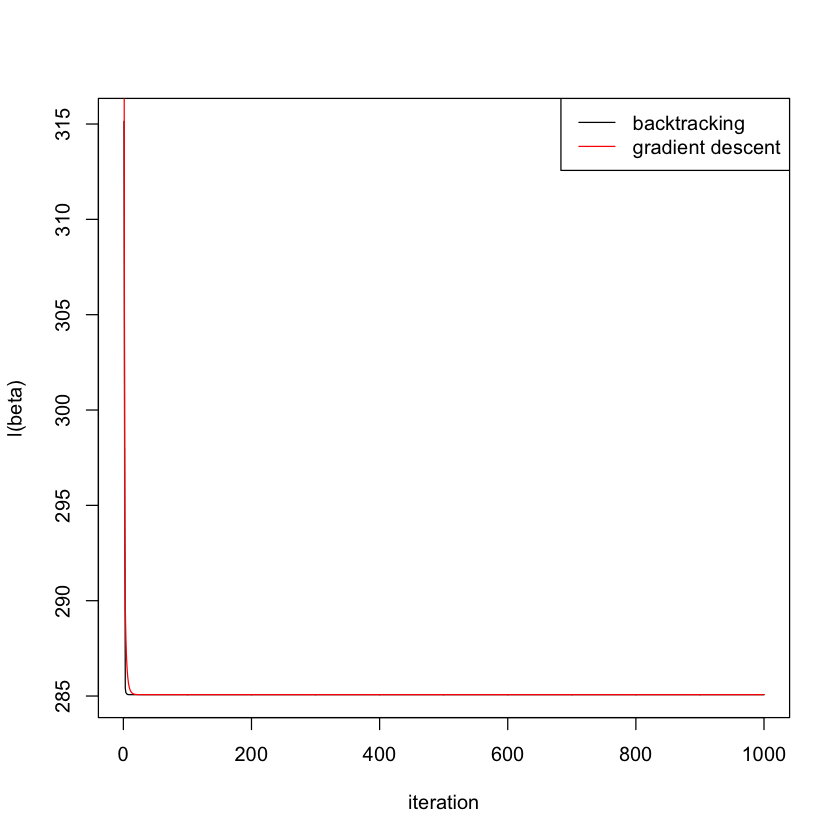

In [10]:
# compare convergence of log likelihood with that of gradient descent coupled with backtracking line search
l.GDBT = GDBT.results[[2]]
plot(1:1000, l.GDBT, type='l', xlab='iteration', ylab='l(beta)')

l.GD = GD.results[[2]]
lines(1:1000, l.GD, type='l', col='red')

legend('topright', legend=c("backtracking", "gradient descent"), lty=c(1,1), col=c('black', 'red'))

## Quasi-Newtion

### Part A

#### Secant condition

From Taylor's theorem, we know that

$\bigtriangledown f(x+p) = \bigtriangledown f(x) + \int_0^1 \bigtriangledown^2 f(x+tp)p$

Therefore,by adding and substracting $\bigtriangledown^2 f(x)p$, we have

$\bigtriangledown f(x+p) = \bigtriangledown f(x) + \bigtriangledown^2 f(x)p + \int_0^1 [\bigtriangledown^2 f(x+tp) - \bigtriangledown^2 f(x)]p\space dt$

$\bigtriangledown f(x+p) = \bigtriangledown f(x) + \bigtriangledown^2 f(x)p + o(\|p\|)$

$\bigtriangledown f_{k+1} = \bigtriangledown f_k + \bigtriangledown^2 f_k (x_{k+1} - x_k) + o(\|x_{k+1} - x_k\|)$

$\bigtriangledown f_{k+1} \approx \bigtriangledown f_k + \bigtriangledown^2 f_k (x_{k+1} - x_k)$

$\bigtriangledown^2 f_k (x_{k+1} - x_k) \approx \bigtriangledown f_{k+1} - \bigtriangledown f_k$

Therefore, the Hessian can be approximated by $\frac {\bigtriangledown f_{k+1} - \bigtriangledown f_k} {x_{k+1} - x_k}$

We use $B_{k+1}$ to present the new Hessian approximation, $s_k = x_{k+1} - x_k$, $y_k = \bigtriangledown f_{k+1} - \bigtriangledown f_k$, then

$B_{k+1} s_k = y_k$

#### BFGS formula

$B_{k+1} = B_k - \frac {B_k s_k s_k^T B_k}{s_k^T B_k s_k} + \frac {y_k y_k^T}{y_k^T s_k}$

**Note:** It can generate positive definite approximations whenever the initial approximation $B_0$ is positive definite and $s_k^T y_k > 0.$

Updating the inverse of $B_k$:

$H_{k+1} = (I - \frac {s_k y_k^T}{y_k^T s_k}) H_k (I - \frac {y_k s_k^T}{y_s^T s_k}) + \frac {s_k s_k^T}{y_k^T s_k}$

This can be computed efficiently without temporary matrices

#### Pseudo-code for BFGS formula

```
delta = f.prime(x, y, betas.new) - f.prime(x, y, betas)
s = betas.new - betas
gamma = 1/(t(delta) * s)
H.new = (I - gamma * s * t(delta)) * H * (I - gamma * delta * t(s)) + gamma * s * t(s)
```



### Part B

In [18]:
# Quasi-Newton's method coupled with backtracking line search on simulated data.
betas = matrix(1, 3, 1)
Qnewton.results <- NewtonBacktracking(x, y, betas, max.iter=500, alpha0 = 1, rho0 = 0.5, c0 = 1e-04, H = diag(dim(betas)[1]))

In [19]:
# Newton's method
betas = matrix(1, 3, 1)
newton.results <- my.newton(x, y, betas, max.iter=500)

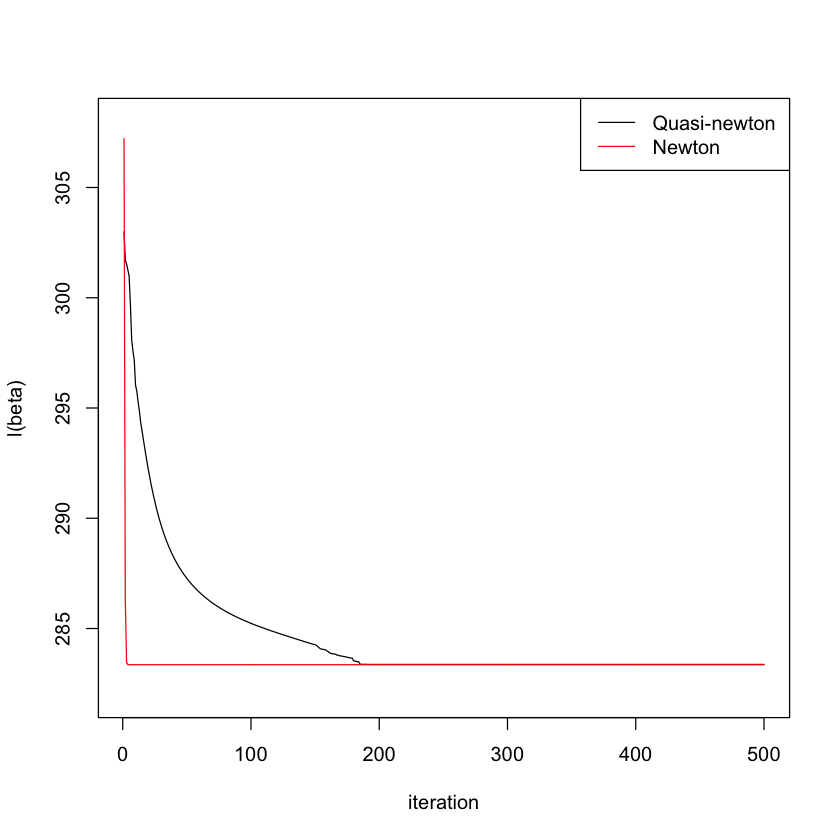

In [22]:
# compare convergence of log likelihood with that of quasi-newton method
l.Qnewton = Qnewton.results[[2]]
plot(1:500, l.Qnewton, type='l', xlab='iteration', ylab='l(beta)', ylim=c(282,308))

l.newton = newton.results[[2]]
lines(1:500, l.newton, type='l', col='red')

legend('topright', legend=c("Quasi-newton", "Newton"), lty=c(1,1), col=c('black', 'red'))